In [17]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, MultiPoint

In [64]:
geographic = pd.read_csv('/home/shade/DS4A/Data/Dataset/Dataset/geographic.csv')
weather = pd.read_csv('/home/shade/DS4A/Data/Dataset/Dataset/weather.csv')
subway = pd.read_csv('/home/shade/DS4A/Data/Dataset/Dataset/mta_trips.csv')

In [4]:
geographic.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [5]:
geographic.columns

Index(['BK88', 'QN52', 'QN48', 'QN51', 'QN27', 'BX35', 'BX98', 'QN07', 'MN06',
       'QN02',
       ...
       'MN25', 'MN24', 'MN23', 'MN13', 'MN15', 'MN32', 'MN33', 'MN99', 'QN18',
       'QN29'],
      dtype='object', length=195)

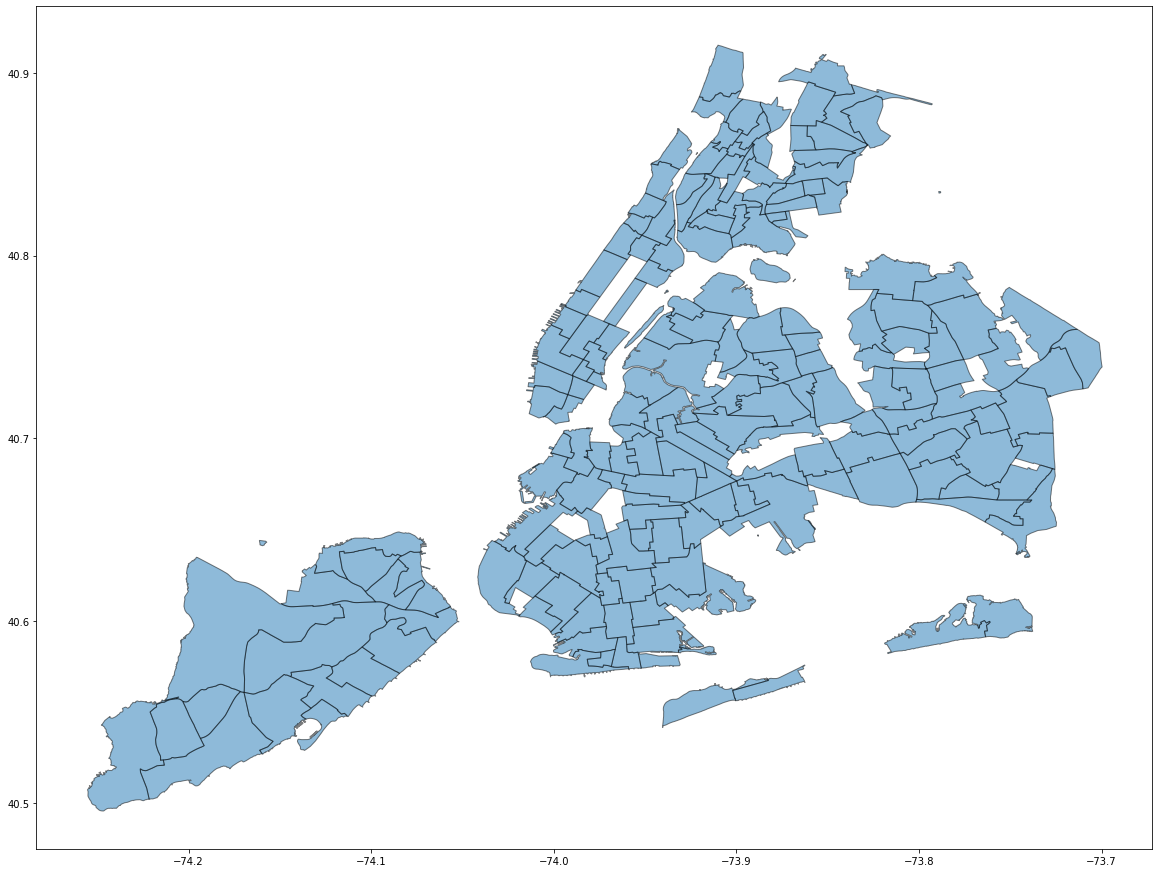

In [43]:
counter = 1
lon = []
lat = []
dfs = []

for j in geographic.columns:
    clean_nan = geographic[j].dropna(how='all')
    
    for i in clean_nan:
        if counter%2:
            lat.append(i)
        else:
            lon.append(i)
        counter = counter + 1

    polygon = Polygon(zip(lat, lon))
    crs = {'init': 'epsg:4326'}
    dfs.append(gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon]))       

    counter = 1
    lon = []
    lat = []

fig, ax = plt.subplots(figsize = (20,16))

for h in dfs:
    mapa = h.plot(figsize=(20,16), alpha=0.5, edgecolor='k', ax=ax)

In [60]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,geometry
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982,POINT (-73.7799821 40.64749)
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982,POINT (-73.7799821 40.64749)
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982,POINT (-73.7799821 40.64749)
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982,POINT (-73.7799821 40.64749)
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982,POINT (-73.7799821 40.64749)


In [80]:
weather[weather['longitude'].unique()]

KeyError: "None of [Float64Index([-73.7799821, -73.87396590000002, -73.9741874], dtype='float64')] are in the [columns]"

In [74]:
weather_Points =[Point(x, y) for x, y in zip(weather['longitude'].unique(), weather['latitude'].unique())]

geo_weather = gpd.GeoDataFrame(weather, geometry=weather_Points)
#geo_weather['geometry'].unique()

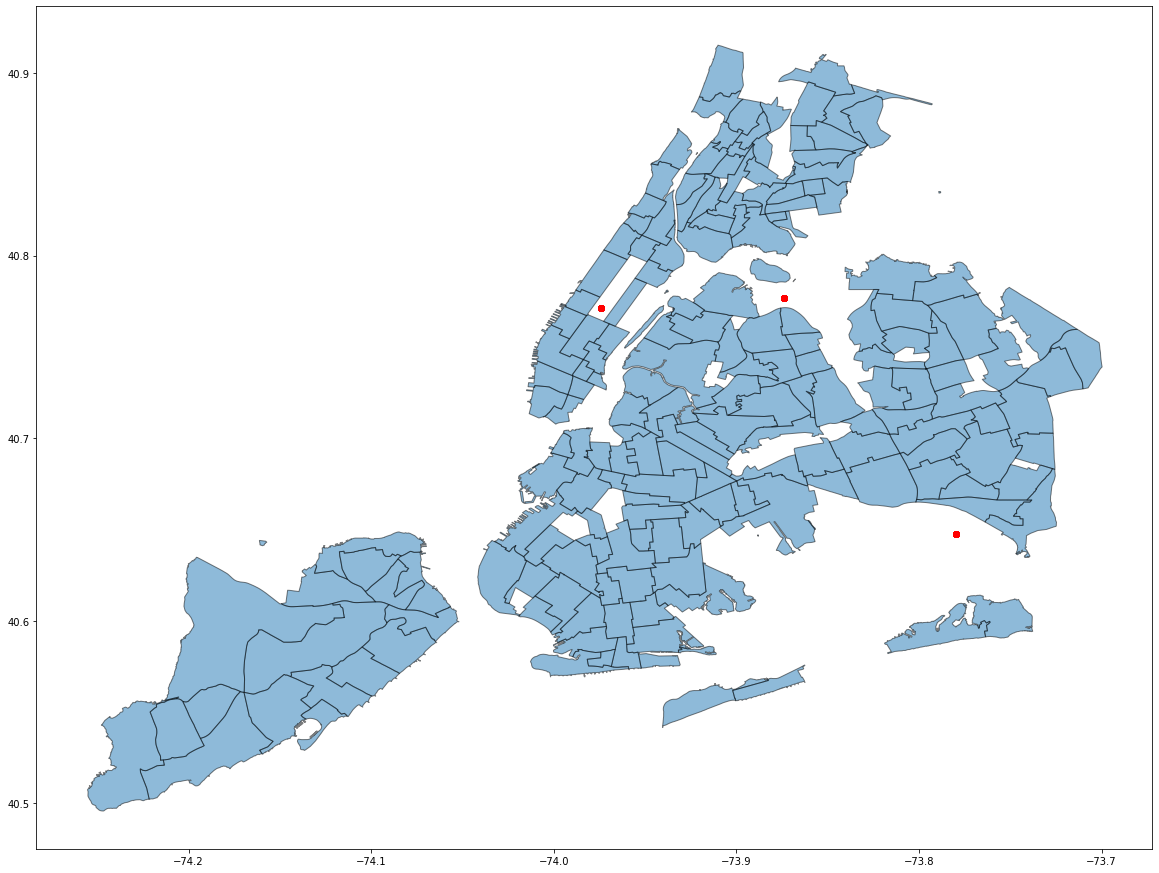

In [61]:
fig, ax = plt.subplots(figsize = (20,16))

for h in dfs:
    mapa = h.plot(figsize=(20,16), alpha=0.5, edgecolor='k', ax=ax)
geo_weather.plot(figsize=(20,16), alpha=0.5, edgecolor='red', color='red', ax=ax)